In [13]:
import numpy as np
import matplotlib.pyplot as plt
import HOHWM
from IPython.core.debugger import Pdb

It shows that we should not use the collcation points as the points we calculate the error. The approximation will behave misleadingly well at these points.

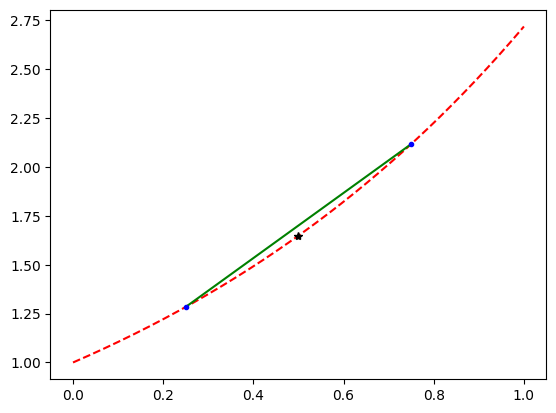

Absolute value of Error at collocation points = [0. 0.] 
Norm of Error at collocation points = 0.0 
Absolute value of Error at x=0.5 = 0.051791445950079895 
number of collocation points= 2


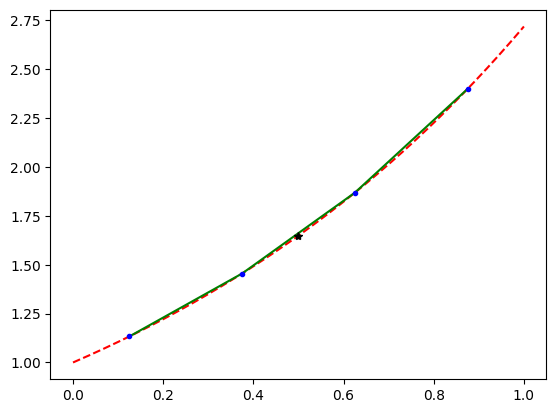

Absolute value of Error at collocation points = [0.00000000e+00 0.00000000e+00 2.22044605e-16 4.44089210e-16] 
Norm of Error at collocation points = 4.965068306494546e-16 
Absolute value of Error at x=0.5 = 0.012897415325083372 
number of collocation points= 4


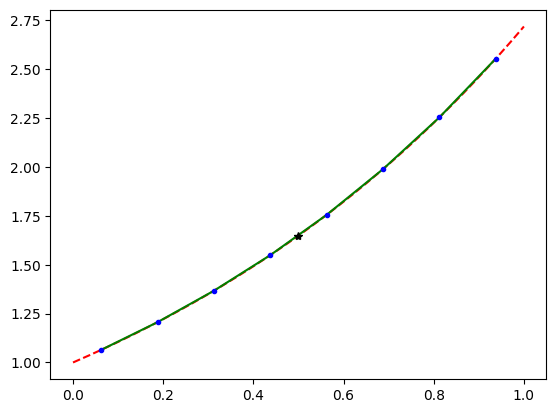

Absolute value of Error at collocation points = [2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 4.44089210e-16 2.22044605e-16 4.44089210e-16 0.00000000e+00] 
Norm of Error at collocation points = 8.005932084973442e-16 
Absolute value of Error at x=0.5 = 0.0032212070970878415 
number of collocation points= 8


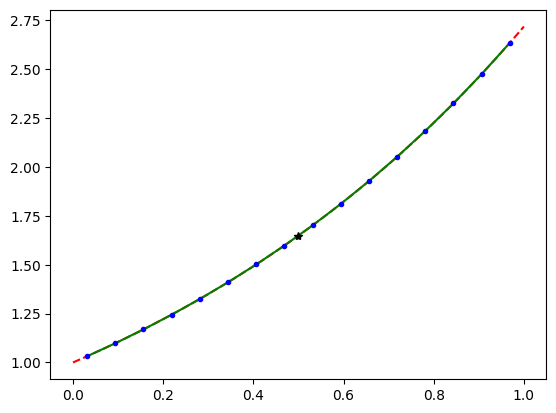

Absolute value of Error at collocation points = [2.22044605e-16 0.00000000e+00 0.00000000e+00 2.22044605e-16
 2.22044605e-16 2.22044605e-16 0.00000000e+00 4.44089210e-16
 2.22044605e-16 2.22044605e-16 0.00000000e+00 4.44089210e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00] 
Norm of Error at collocation points = 8.308148362110449e-16 
Absolute value of Error at x=0.5 = 0.0008051051993889224 
number of collocation points= 16


In [16]:
col_size = [1, 2, 4, 8]
err_local = np.zeros(len(col_size))
err_global = np.zeros(len(col_size))
f = lambda x: np.exp(x) + np.exp(-x)
K = lambda x, t: -np.exp(-(x + t))
u_true = lambda x: np.exp(x)
test = HOHWM.IntegralEquation(linear=True, type="Fredholm", f=f, K=K)
for M in col_size:
    u_haar_approx = test.solve(N=2 * M, approx=True)
    u_approx_func = test.solve(N=2 * M, approx_func=True)

    x = HOHWM.collocation(2 * M)
    x2 = np.linspace(0, 1, 1000)
    x_half = 0.5
    plt.plot(x2, u_true(x2), "r--", x, u_haar_approx, "g", x, u_true(x), "b.",
             x_half, u_true(x_half), "k*")
    plt.show()
    u_true_vec = u_true(x)
    u_haar_approx_vec = u_haar_approx
    print("Absolute value of Error at collocation points =",
          abs(u_true_vec - u_haar_approx_vec), "\n"
          "Norm of Error at collocation points =",
          np.linalg.norm(u_true_vec - u_haar_approx_vec), "\n"
          "Absolute value of Error at x=0.5 =",
          abs(u_true(x_half) - u_approx_func(x_half)), "\n"
          "number of collocation points=", 2 * M)